<a href="https://colab.research.google.com/github/Aakriti555/Nammi-assignment/blob/main/left_knee_Bone_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1.1 – Bone Segmentation
Your first task is to segment the femur and tibia regions from the provided CT image, as illustrated in Figure
1.B and save as nii.gz format. Apply only image processing techniques.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [2]:
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)

In [3]:
print(type(img))


<class 'nibabel.nifti1.Nifti1Image'>


In [4]:
print(img.shape)

(512, 512, 216)


In [5]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header

In [6]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(np.float32(0.869141), np.float32(0.869141), np.float32(2.0))

In [7]:
hdr.get_xyzt_units()


('mm', 'unknown')

In [8]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(512, 512, 216)


In [9]:
print(img_data)

[[[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 ...

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -30

In [10]:
mid_slice_x = img_data[:,255, :]
print(mid_slice_x.shape)

(512, 216)


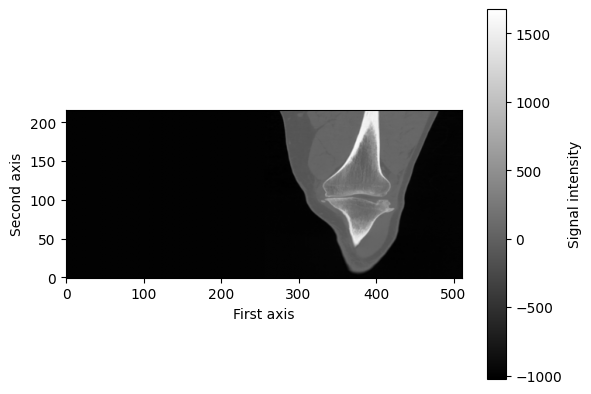

In [11]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

MRI shape: (512, 512, 216)
Voxel dimensions: (np.float32(0.869141), np.float32(0.869141), np.float32(2.0))
Units: ('mm', 'unknown')


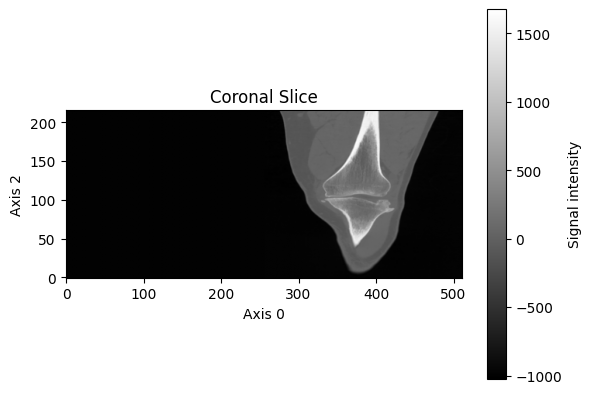

In [12]:
from scipy.ndimage import label

# Load MRI
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()

print("MRI shape:", img_data.shape)
print("Voxel dimensions:", img.header.get_zooms())
print("Units:", img.header.get_xyzt_units())

# Visualize a coronal slice
mid_slice_x = img_data[:, 255, :]
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.title("Coronal Slice")
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')
plt.colorbar(label='Signal intensity')
plt.show()


MRI shape: (512, 512, 216)
Voxel dimensions: (np.float32(0.869141), np.float32(0.869141), np.float32(2.0))
Units: ('mm', 'unknown')


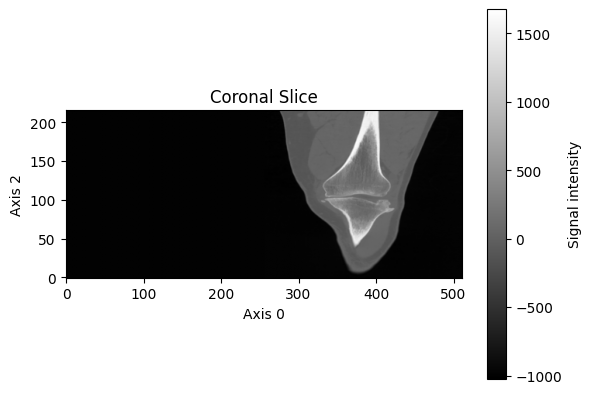

In [13]:
from scipy.ndimage import label

# Load MRI
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()

print("MRI shape:", img_data.shape)
print("Voxel dimensions:", img.header.get_zooms())
print("Units:", img.header.get_xyzt_units())

# Visualize a coronal slice
mid_slice_x = img_data[:, 255, :]
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.title("Coronal Slice")
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')
plt.colorbar(label='Signal intensity')
plt.show()

Found 511 connected components.


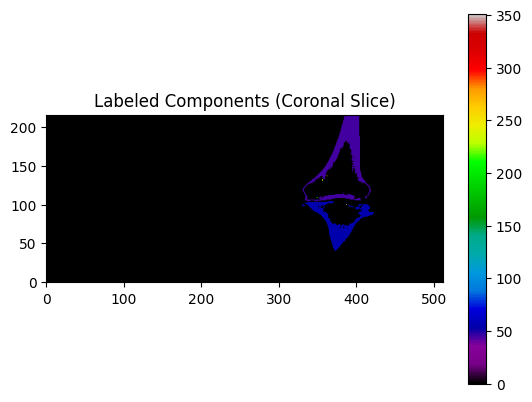

In [14]:
# Apply threshold to segment bones (adjust threshold as needed)
threshold = 350 #350 sweet spot
bone_mask = img_data > threshold

# Label connected components
labeled_array, num_features = label(bone_mask)
print(f"Found {num_features} connected components.")

# Visual check (optional)
plt.imshow(labeled_array[:, 255, :].T, cmap='nipy_spectral', origin='lower')
plt.title("Labeled Components (Coronal Slice)")
plt.colorbar()

plt.show()

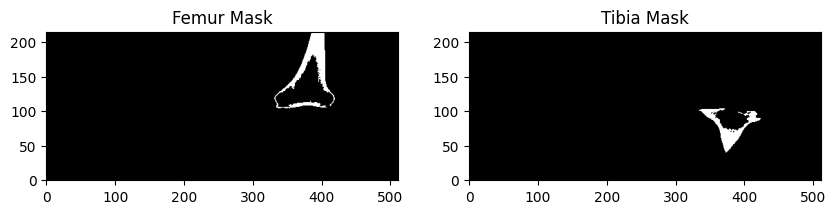

In [15]:
# Get the sizes of each component
component_sizes = [(labeled_array == i).sum() for i in range(1, num_features + 1)]
sorted_indices = np.argsort(component_sizes)[::-1]  # Descending order

# Get femur and tibia masks (first 2 largest components)
femur_mask = labeled_array == (sorted_indices[0] + 1)
tibia_mask = labeled_array == (sorted_indices[1] + 1)

# Optional visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(femur_mask[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Femur Mask')

plt.subplot(1, 2, 2)
plt.imshow(tibia_mask[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Tibia Mask')
plt.show()

In [16]:
from scipy.ndimage import binary_fill_holes

# Fill holes slice by slice (along axis=1, i.e., coronal slices)
femur_mask_filled = np.zeros_like(femur_mask)
tibia_mask_filled = np.zeros_like(tibia_mask)

for i in range(femur_mask.shape[1]):  # Loop over coronal slices
    femur_mask_filled[:, i, :] = binary_fill_holes(femur_mask[:, i, :])
    tibia_mask_filled[:, i, :] = binary_fill_holes(tibia_mask[:, i, :])


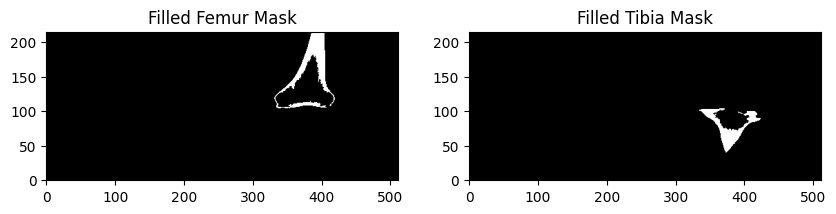

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(femur_mask_filled[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Filled Femur Mask')

plt.subplot(1, 2, 2)
plt.imshow(tibia_mask_filled[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Filled Tibia Mask')
plt.show()


In [18]:
femur_data = img_data * femur_mask
tibia_data = img_data * tibia_mask

In [19]:
# Save femur image with original intensities
femur_img = nib.Nifti1Image(femur_data.astype(np.float32), img.affine, img.header)
nib.save(femur_img, '/content/femur_intensity.nii.gz')

# Save tibia image with original intensities
tibia_img = nib.Nifti1Image(tibia_data.astype(np.float32), img.affine, img.header)
nib.save(tibia_img, '/content/tibia_intensity.nii.gz')


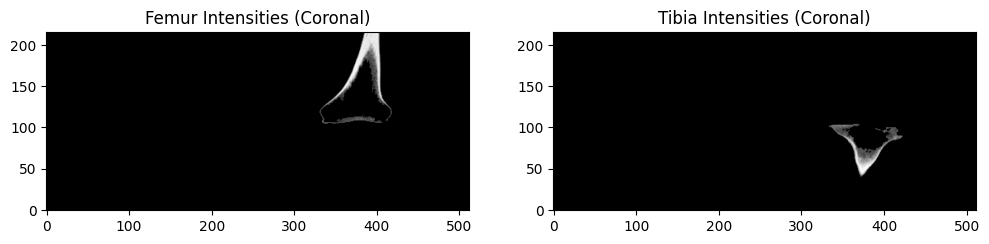

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(femur_data[:, 255, :].T, cmap='gray', origin='lower')
plt.title("Femur Intensities (Coronal)")

plt.subplot(1, 2, 2)
plt.imshow(tibia_data[:, 255, :].T, cmap='gray', origin='lower')
plt.title("Tibia Intensities (Coronal)")

plt.show()

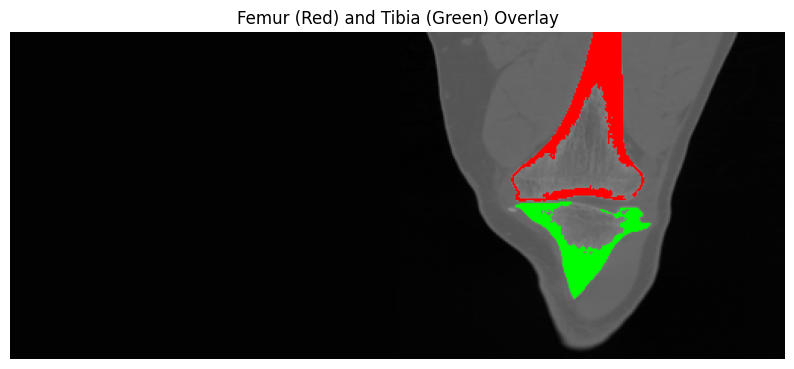

In [21]:
slice_index = 255  # adjust as needed
# Grayscale base slice
base_slice = img_data[:, slice_index, :]

# Masks for the same slice
femur_slice = femur_mask[:, slice_index, :]
tibia_slice = tibia_mask[:, slice_index, :]

# Normalize image for display
base_norm = (base_slice - np.min(base_slice)) / (np.max(base_slice) - np.min(base_slice))
base_rgb = np.stack([base_norm]*3, axis=-1)  # Grayscale to RGB

# Add femur in red
base_rgb[femur_slice == 1] = [1.0, 0.0, 0.0]

# Add tibia in green
base_rgb[tibia_slice == 1] = [0.0, 1.0, 0.0]
base_rgb_landscape = np.transpose(base_rgb, (1, 0, 2))

# Display
plt.figure(figsize=(10, 7))
plt.imshow(np.flipud(base_rgb_landscape), origin='upper')  # Flip vertically for correct anatomical view
plt.title('Femur (Red) and Tibia (Green) Overlay')
plt.axis('off')
plt.show()

Task 1.2 – Contour Expansion
The second task requires you to expand the segmented mask by 2 mm uniformly outward. 2mm should be
parameter.

In [22]:
import numpy as np
import nibabel as nib
from scipy.ndimage import binary_dilation, generate_binary_structure
from skimage.morphology import ball

def expand_mask(mask, nii_header, expansion_mm=2.0):
    """
    Expands a 3D binary mask uniformly by the given distance in mm.

    Args:
        mask (np.ndarray): 3D binary mask to expand.
        nii_header: Nibabel header object containing voxel dimensions.
        expansion_mm (float): Distance in millimeters to expand.

    Returns:
        np.ndarray: Expanded binary mask.
    """
    voxel_sizes = nii_header.get_zooms()[:3]  # Get voxel dimensions in mm
    voxel_radius = int(np.round(expansion_mm / np.mean(voxel_sizes)))  # Approximate spherical radius in voxels

    # Create a 3D spherical structuring element with that radius
    struct_elem = ball(voxel_radius)

    # Apply binary dilation
    expanded_mask = binary_dilation(mask, structure=struct_elem)

    return expanded_mask.astype(np.uint8)


In [23]:
femur_expanded = expand_mask(femur_mask, img.header, expansion_mm=2.0)
tibia_expanded = expand_mask(tibia_mask, img.header, expansion_mm=2.0)


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_expansion(base_image, original_mask, expanded_mask, slice_index=255, title="Expanded Mask"):
    """
    Overlays original and expanded masks on a grayscale MRI slice.

    Args:
        base_image (np.ndarray): Original 3D MRI data.
        original_mask (np.ndarray): Binary 3D mask before expansion.
        expanded_mask (np.ndarray): Binary 3D mask after expansion.
        slice_index (int): Index of coronal slice to visualize.
        title (str): Plot title.
    """
    base_slice = base_image[:, slice_index, :]
    original_slice = original_mask[:, slice_index, :]
    expanded_slice = expanded_mask[:, slice_index, :]

    # Normalize the base slice for RGB visualization
    base_norm = (base_slice - np.min(base_slice)) / (np.max(base_slice) - np.min(base_slice))
    rgb_image = np.stack([base_norm]*3, axis=-1)

    # Overlay: original in green, expansion-only in red
    expansion_only = np.logical_and(expanded_slice == 1, original_slice == 0)
    rgb_image[original_slice == 1] = [0.0, 1.0, 0.0]    # Original = Green
    rgb_image[expansion_only]    = [1.0, 0.0, 0.0]      # Expanded = Red

    # Transpose for landscape view
    rgb_image_landscape = np.transpose(rgb_image, (1, 0, 2))

    plt.figure(figsize=(10, 7))
    plt.imshow(rgb_image_landscape, origin='upper')
    plt.title(title)
    plt.axis('off')
    plt.show()


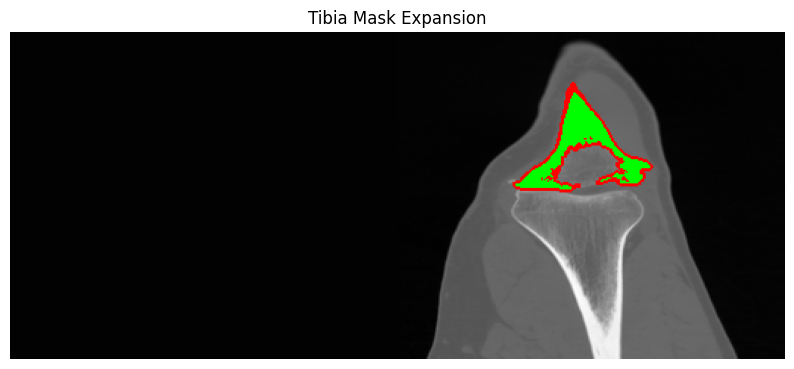

In [25]:
visualize_expansion(img_data, tibia_mask, tibia_expanded, title="Tibia Mask Expansion")


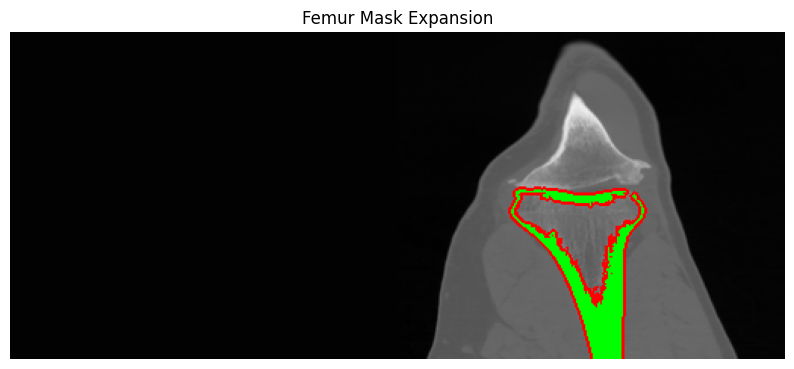

In [26]:
visualize_expansion(img_data, femur_mask, femur_expanded, title="Femur Mask Expansion")

Task 1.3 – Randomized Contour Adjustment The third task involves randomizing the expanded segmented mask such that: • The new mask lies between the original segmentation mask and the 2 mm expanded mask. • The randomized mask must not exceed the 2 mm expansion limit. • The contour must not shrink below the original segmentation contour. • 2 mm and random value should be parameter.

In [27]:
import random

def generate_random_number(min_val, max_val):
  return random.randint(min_val, max_val)

In [28]:
random=generate_random_number(0,2.0)
femur_random = expand_mask(femur_mask, img.header, expansion_mm=random)
tibia_random = expand_mask(tibia_mask, img.header, expansion_mm=random)


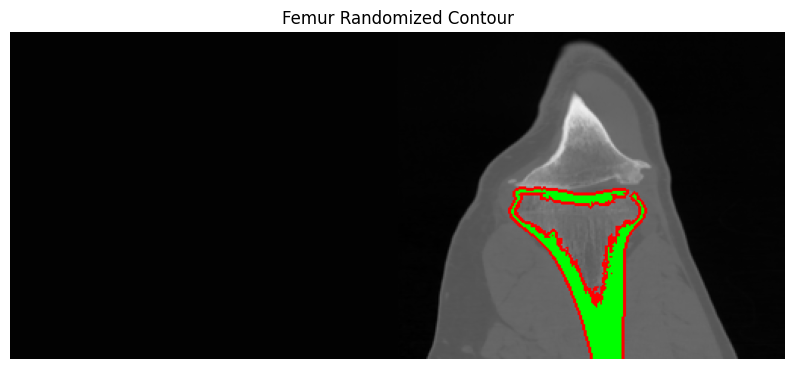

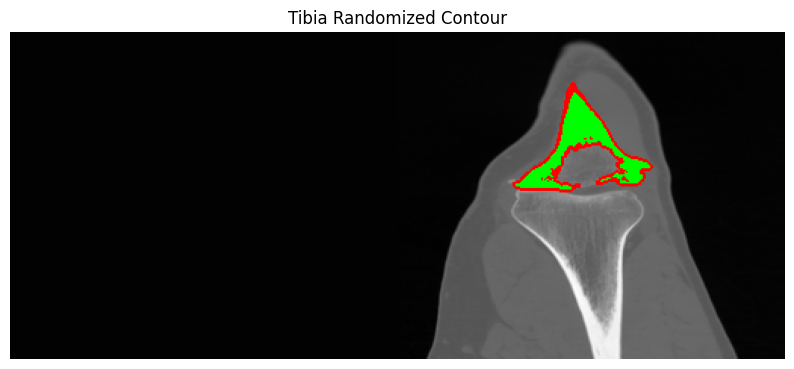

In [29]:
visualize_expansion(img_data, femur_mask, femur_random, title="Femur Randomized Contour")
visualize_expansion(img_data, tibia_mask, tibia_random, title="Tibia Randomized Contour")
